# 1. Introduction

The aim of this project is to ***use exploratory data analysis (EDA) and regression to predict alcohol levels in wine with a model that's as accurate as possible***. 

I am going to use the red wine dataset, wineQualityReds.csv, which is freely available on Kaggle, [here](https://www.kaggle.com/piyushgoyal443/red-wine-dataset).

# 2. Sourcing and loading

## 2a. Import relevant libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
import warnings 

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

## 2b. Load the data

In [2]:
wine = pd.read_csv('wineQualityReds.csv')

## 2c. Exploring the data

In [3]:
wine.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1599 non-null   int64  
 1   fixed.acidity         1599 non-null   float64
 2   volatile.acidity      1599 non-null   float64
 3   citric.acid           1599 non-null   float64
 4   residual.sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free.sulfur.dioxide   1599 non-null   float64
 7   total.sulfur.dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [5]:
wine.shape

(1599, 13)

# 3. Exploratory Data Analysis

## 3a. Correlation table

I will call the .corr() method on our wine data to look at all the correlations between our variables. As the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) shows, the default correlation coefficient is the Pearson correlation coefficient (p.58 and p.396 of the *AoS*); but other coefficients can be plugged in as parameters. Remember, the Pearson correlation coefficient shows us how close to a straight line the data-points fall, and is a number between -1 and 1. 

In [9]:
wine.corr()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
Unnamed: 0,1.000000,-0.268484,-0.008815,-0.153551,-0.031261,-0.119869,0.090480,-0.117850,-0.368372,0.136005,-0.125307,0.245123,0.066453
fixed.acidity,-0.268484,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile.acidity,-0.008815,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric.acid,-0.153551,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual.sugar,-0.031261,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,-0.119869,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free.sulfur.dioxide,0.090480,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total.sulfur.dioxide,-0.117850,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,-0.368372,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,0.136005,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731


## 3b. Correlation pairplots

Now that we've chosen alcohol level as our dependent variable for regression analysis, we can begin by plotting the pairwise relationships in the dataset, to check out how our variables relate to one another.

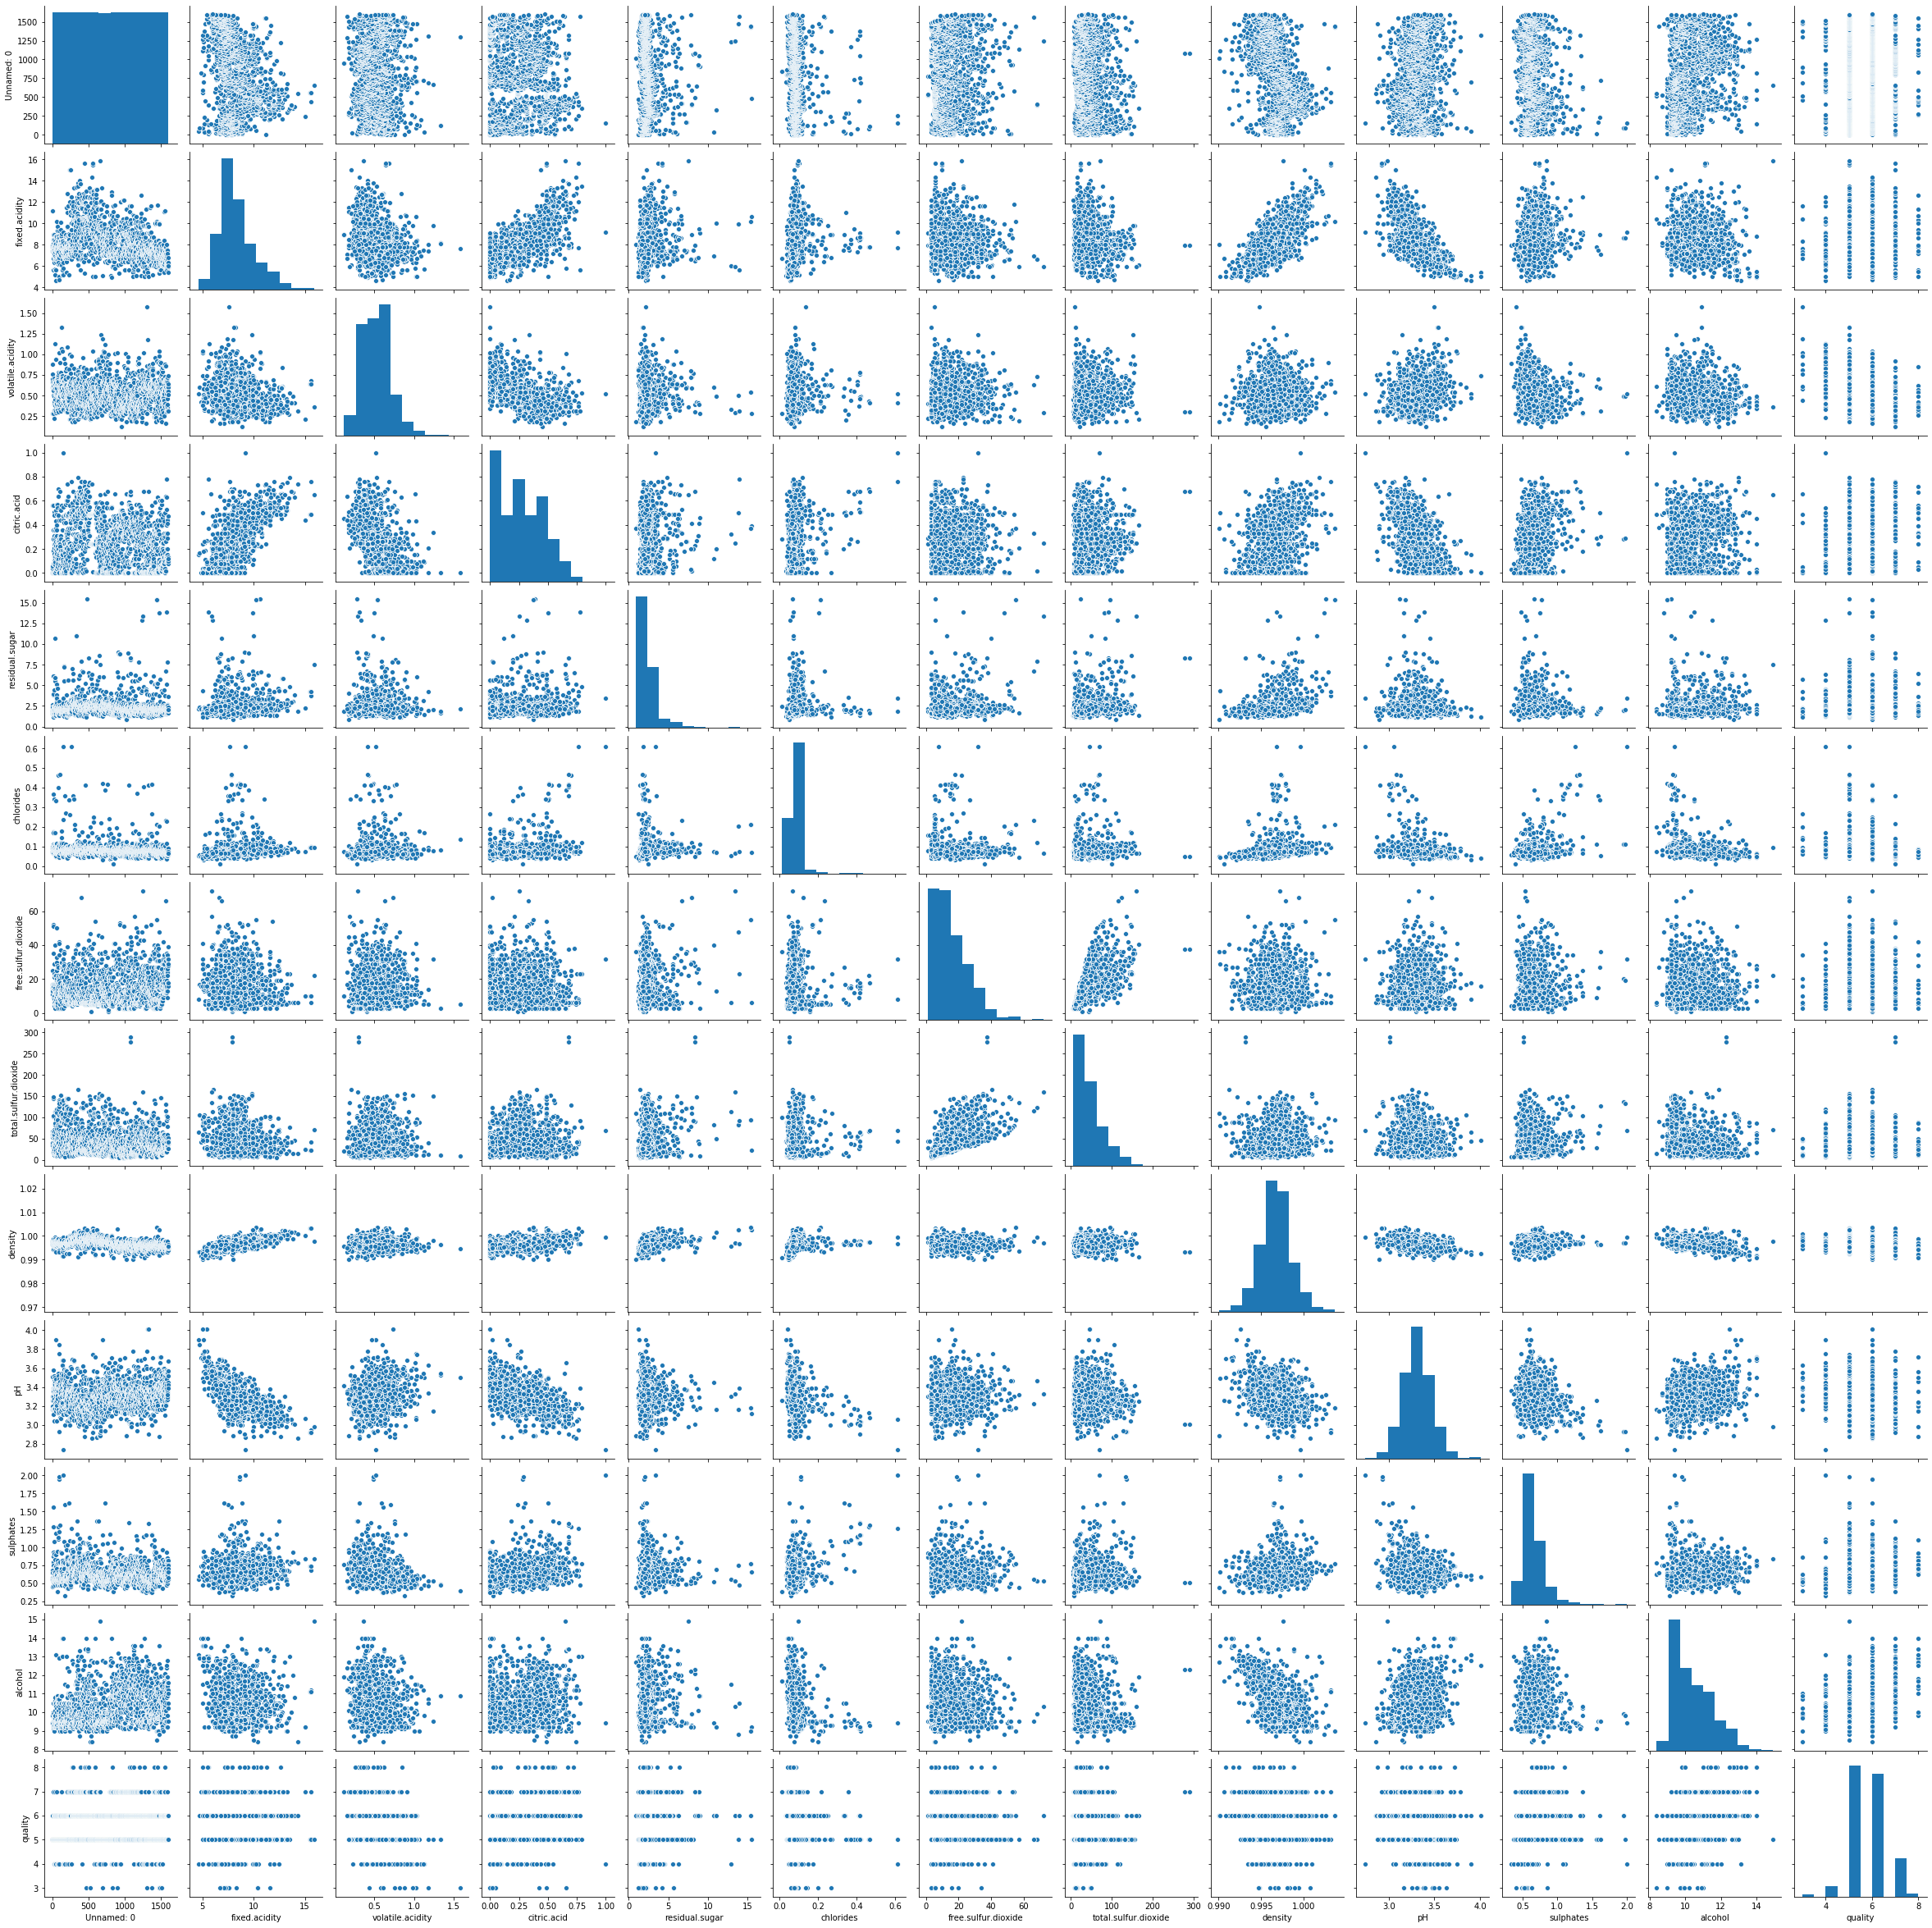

In [10]:
# Make a pairplot of the wine data
_ = sns.pairplot(wine)
plt.show()

## 3c. Correlation heatmap

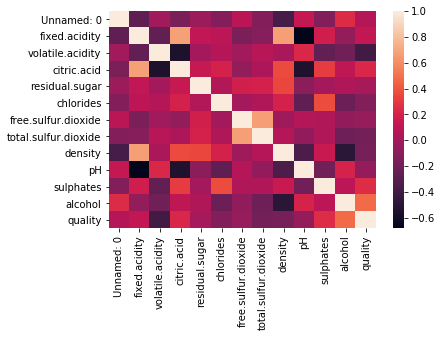

In [11]:
sns.heatmap(wine.corr())

There is a relatively strong correlation between the density and fixed acidity variables respectively.

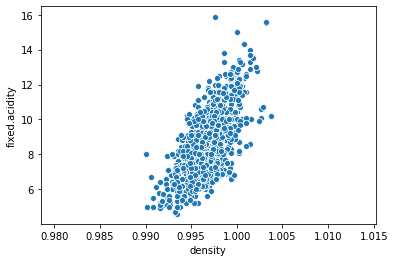

In [12]:
sns.scatterplot(x='density', y='fixed.acidity', data=wine)

We can see a positive correlation, and quite a steep one. There are some outliers, but as a whole, there is a steep looking line that looks like it ought to be drawn. 

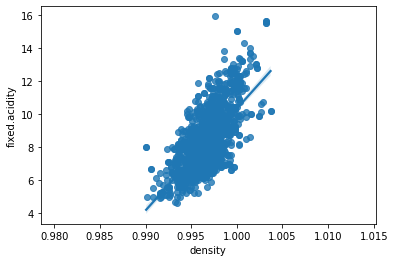

In [13]:
sns.regplot(x='density', y='fixed.acidity', data=wine)

The line of best fit matches the overall shape of the data, but it's clear that there are some points that deviate from the line, rather than all clustering close. 

I will now attempt to predict fixed acidity based on density using linear regression. 

# 4. Modeling 

## 4a. Train/test split

In [14]:
X = wine[['density']]
y = wine[['fixed.acidity']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1199, 1), (1199, 1), (400, 1), (400, 1))

## 4b. Linear regression

In [16]:
rModel = linear_model.LinearRegression(normalize=True)

In [17]:
rModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [18]:
rModel.score(X_train, y_train)

0.46237440472737257

The above score is called R-Squared coefficient, or the "coefficient of determination". It's basically a measure of how successfully our model predicts the variations in the data away from the mean: 1 would mean a perfect model that explains 100% of the variation. At the moment, our model explains only about 23% of the variation from the mean.

In [19]:
# Use the model to make predictions about our test data
y_pred = rModel.predict(X_train)

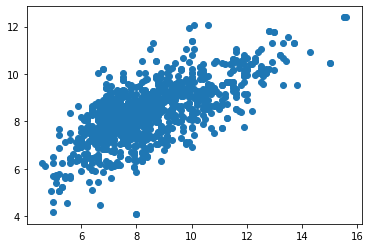

In [20]:
# Let's plot the predictions against the actual result. Use scatter()
_ = plt.scatter(y_train, y_pred)

The above scatterplot represents how well the predictions match the actual results. 

Along the x-axis, we have the actual fixed acidity, and along the y-axis we have the predicted value for the fixed acidity.

There is a visible positive correlation, as the model has not been totally unsuccesful, but it's clear that it is not maximally accurate: wines with an actual fixed acidity of just over 10 have been predicted as having acidity levels from about 6.3 to 13.

## 4c. Linear regression: Ordinary Least Squares (OLS)

In [21]:
X = wine[['density']]
X = sm.add_constant(X)

In [22]:
y = wine[['fixed.acidity']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [23]:
model = sm.OLS(y_train, X_train)
rModel2 = model.fit()

In [24]:
rModel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          fixed.acidity   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     883.2
Date:                Fri, 25 Sep 2020   Prob (F-statistic):          8.03e-146
Time:                        17:54:10   Log-Likelihood:                -2019.7
No. Observations:                1199   AIC:                             4043.
Df Residuals:                    1197   BIC:                             4054.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -575.6364     19.649    -29.297      0.000    -614.186    -537.087
density      585.8488     19.713     29.718      0.000     547.172     624.526
==============================================================================
Omnibus:                       61.174   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.531
Skew:                           0.586   Prob(JB):                     7.97e-16
Kurtosis:                       3.134   Cond. No.                     1.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
y_pred = model.fit().predict(X_test)

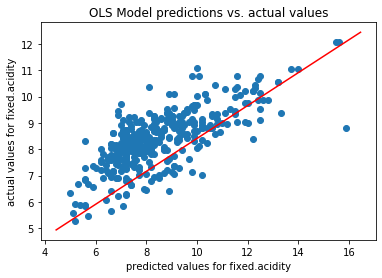

In [26]:
_ = plt.scatter(y_test, y_pred)

_ = plt.plot(plt.xlim(), plt.ylim(), color='red')

_ = plt.xlabel('predicted values for fixed.acidity')
_ = plt.ylabel('actual values for fixed.acidity')
_ = plt.title('OLS Model predictions vs. actual values')

The red line shows a theoretically perfect correlation between our actual and predicted values - the line that would exist if every prediction was completely correct. It's clear that while our points have a generally similar direction, they don't match the red line at all. 

To get a better predictive model, I should use more than one variable.

## 4d. Multiple linear regression

In [27]:
X = wine[[column for column in wine.columns if column not in ['fixed.acidity', 'quality']]]

X = sm.add_constant(X)
y = wine[['fixed.acidity']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [28]:
X_train = np.array(X_train)
y_train = np.array(y_train)
model = sm.OLS(y_train, X_train)

rModel3 = model.fit()

In [29]:
rModel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     747.4
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:54:11   Log-Likelihood:                -1117.8
No. Observations:                1199   AIC:                             2260.
Df Residuals:                    1187   BIC:                             2321.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -605.2054     15.068    -40.166      0.000    -634.768    -575.643
x1            -0.0001   4.36e-05     -3.291      0.001      -0.000   -5.79e-05
x2             0.2750      0.129      2.137      0.033       0.023       0.528
x3             1.9437      0.150     12.931      0.000       1.649       2.239
x4            -0.2435      0.015    -16.104      0.000      -0.273      -0.214
x5            -3.7160      0.451     -8.243      0.000      -4.600      -2.832
x6             0.0104      0.002      4.287      0.000       0.006       0.015
x7            -0.0071      0.001     -8.973      0.000      -0.009      -0.006
x8           628.4675     15.004     41.888      0.000     599.031     657.904
x9            -5.2855      0.144    -36.599      0.000      -5.569      -5.002
x10           -0.7659      0.119     -6.415      0.000      -1.000      -0.532
x11            0.5421      0.025     22.002      0.000       0.494       0.590
==============================================================================
Omnibus:                       25.226   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.579
Skew:                           0.095   Prob(JB):                     4.66e-11
Kurtosis:                       3.957   Cond. No.                     1.11e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-Squared score shows a big improvement - our first model predicted only around 45% of the variation, but now we are predicting 87%.

In [30]:
y_pred = rModel3.predict(X_test)

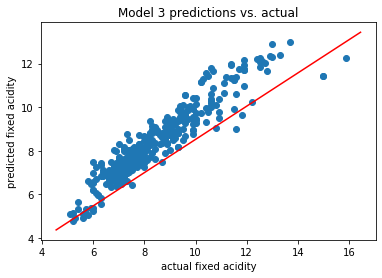

In [31]:
_ = plt.scatter(y_test, y_pred)
_ = plt.plot(plt.xlim(), plt.ylim(), color='red')
_ = plt.title('Model 3 predictions vs. actual')
_ = plt.xlabel('actual fixed acidity')
_ = plt.ylabel('predicted fixed acidity')

We've now got a much closer match between our data and our predictions, and we can see that the shape of the data points is much more similar to the red line. 

We can check another metric as well - the RMSE (Root Mean Squared Error).

In [32]:
def RMSE(actual, pred):
    rmse = np.sqrt(np.mean((pred - actual) ** 2))
    print(rmse)

In [34]:
y_pred = rModel3.predict(X_test)

rModel3_df = pd.concat([y_test, y_pred], axis=1)
rModel3_df.columns = ['actual', 'pred']
RMSE(rModel3_df.actual, rModel3_df.pred)

0.6377588268854445


The RMSE tells us how far, on average, our predictions were mistaken. An RMSE of 0 would mean we were making perfect predictions. 0.6 signifies that we are, on average, about 0.6 of a unit of fixed acidity away from the correct answer. That's not bad at all.

## 4e. Multiple linear regression model: avoiding redundancy

We can also see from our early heat map that volatile.acidity and citric.acid are both correlated with pH. We can make a model that ignores those two variables and just uses pH, in an attempt to remove redundancy from our model.

In [35]:
X = wine.drop(['fixed.acidity', 'quality', 'volatile.acidity', 'citric.acid'], axis=1)
y = wine[['fixed.acidity']]

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [36]:
rModel4 = sm.OLS(y_train, X_train)
rModel4_results = rModel4.fit()
rModel4_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          fixed.acidity   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     765.0
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:55:11   Log-Likelihood:                -1216.7
No. Observations:                1199   AIC:                             2453.
Df Residuals:                    1189   BIC:                             2504.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -702.7775     15.233    -46.136      0.000    -732.664    -672.891
Unnamed: 0              -0.0002   4.65e-05     -3.632      0.000      -0.000   -7.76e-05
residual.sugar          -0.2673      0.017    -16.171      0.000      -0.300      -0.235
chlorides               -3.1356      0.473     -6.636      0.000      -4.063      -2.209
free.sulfur.dioxide      0.0114      0.003      4.357      0.000       0.006       0.017
total.sulfur.dioxide    -0.0064      0.001     -7.429      0.000      -0.008      -0.005
density                728.5286     15.046     48.420      0.000     699.009     758.048
pH                      -6.2907      0.139    -45.356      0.000      -6.563      -6.019
sulphates               -0.4662      0.131     -3.559      0.000      -0.723      -0.209
alcohol                  0.6982      0.024     28.716      0.000       0.650       0.746
==============================================================================
Omnibus:                      135.859   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.244
Skew:                           0.661   Prob(JB):                     5.21e-67
Kurtosis:                       5.089   Cond. No.                     1.02e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-squared score has reduced, showing us that actually, the removed columns were important.

# 5. Conclusion

My most predictively powerful model was the 3rd model, but this model had explanatory variables that were correlated with one another, which made some redundancy. my most elegant and economical model was the 4th model - it used just a few predictors to get a good result. 